In [12]:
from tardis_dev import datasets, get_exchange_details
import logging
import nest_asyncio
nest_asyncio.apply()
# comment out to disable debug logs
logging.basicConfig(level=logging.DEBUG)

# function used by default if not provided via options
def default_file_name(exchange, data_type, date, symbol, format):
    return f"{exchange}_{data_type}_{date.strftime('%Y-%m-%d')}_{symbol}.{format}.gz"


# customized get filename function - saves data in nested directory structure
def file_name_nested(exchange, data_type, date, symbol, format):
    return f"{exchange}/{data_type}/{date.strftime('%Y-%m-%d')}_{symbol}.{format}.gz"


# returns data available at https://api.tardis.dev/v1/exchanges/deribit
# deribit_details = get_exchange_details("bitget")
# print(deribit_details)

datasets.download(
    # one of https://api.tardis.dev/v1/exchanges with supportsDatasets:true - use 'id' value
    exchange="binance",
    # accepted data types - 'datasets.symbols[].dataTypes' field in https://api.tardis.dev/v1/exchanges/deribit,
    # or get those values from 'deribit_details["datasets"]["symbols][]["dataTypes"] dict above
    data_types=[ "trades","book_ticker","book_snapshot_25"],
    # change date ranges as needed to fetch full month or year for example
    from_date="2025-07-22",
    # to date is non inclusive
    to_date="2025-07-23",
    # accepted values: 'datasets.symbols[].id' field in https://api.tardis.dev/v1/exchanges/deribit
    symbols=["DOGEUSDT"],
    # (optional) your API key to get access to non sample data as well
    api_key="TD.a7llxfcsHSHNuXpP.VrleIk4GlA94hSl.W27nIauyoQyBj0b.tgz-9ol0hSxcMVp.v3onwE4wKSco5NQ.poB-",
    # (optional) path where data will be downloaded into, default dir is './datasets'
    # download_dir="./datasets",
    # (optional) - one can customize downloaded file name/path (flat dir strucure, or nested etc) - by default function 'default_file_name' is used
    # get_filename=default_file_name,
    # (optional) file_name_nested will download data to nested directory structure (split by exchange and data type)
    # get_filename=file_name_nested,
)

DEBUG:tardis_dev.datasets.download:download started for binance trades DOGEUSDT from 2025-07-22 to 2025-07-23
DEBUG:tardis_dev.datasets.download:download finished for binance trades DOGEUSDT from 2025-07-22 to 2025-07-23, total time: 6.232418775558472 seconds
DEBUG:tardis_dev.datasets.download:download started for binance book_ticker DOGEUSDT from 2025-07-22 to 2025-07-23
DEBUG:tardis_dev.datasets.download:download finished for binance book_ticker DOGEUSDT from 2025-07-22 to 2025-07-23, total time: 7.5716822147369385 seconds
DEBUG:tardis_dev.datasets.download:download started for binance book_snapshot_25 DOGEUSDT from 2025-07-22 to 2025-07-23
DEBUG:tardis_dev.datasets.download:download finished for binance book_snapshot_25 DOGEUSDT from 2025-07-22 to 2025-07-23, total time: 6.917912721633911 seconds


In [16]:
import pandas as pd
data_binance_quotes_future = pd.read_csv('../datasets/binance-futures_book_snapshot_25_2025-07-22_DOGEUSDT.csv')
data_binance_trade_future = pd.read_csv('../datasets/binance-futures_trades_2025-07-22_DOGEUSDT.csv')
data_binance_ticker_future = pd.read_csv('../datasets/binance-futures_book_ticker_2025-07-22_DOGEUSDT.csv')
# data_binance_trade.isnull().sum()
# data_binance_trade


In [18]:
print(86400 / len(data_binance_quotes_future), 86400 / len(data_binance_trade_future),86400 / len(data_binance_ticker_future))

0.053088503573950015 0.019398176077513676 0.004589375945264043


In [ ]:
data_binance_trade

In [20]:
data_binance_snap25_spot = pd.read_csv("../datasets/binance_book_snapshot_25_2025-07-22_DOGEUSDT.csv")
data_binance_trade_spot = pd.read_csv("../datasets/binance_trades_2025-07-22_DOGEUSDT.csv")
data_binance_ticker_spot = pd.read_csv("../datasets/binance_book_ticker_2025-07-22_DOGEUSDT.csv")

In [36]:
data_binance_ticker_future

exchange    symbol         timestamp   local_timestamp  \
0         binance-futures  DOGEUSDT  1753142400010000  1753142400014694   
1         binance-futures  DOGEUSDT  1753142400013000  1753142400018568   
2         binance-futures  DOGEUSDT  1753142400014000  1753142400018575   
3         binance-futures  DOGEUSDT  1753142400014000  1753142400018575   
4         binance-futures  DOGEUSDT  1753142400014000  1753142400018576   
...                   ...       ...               ...               ...   
18826084  binance-futures  DOGEUSDT  1753228799848000  1753228799849981   
18826085  binance-futures  DOGEUSDT  1753228799849000  1753228799851971   
18826086  binance-futures  DOGEUSDT  1753228799849000  1753228799851982   
18826087  binance-futures  DOGEUSDT  1753228799851000  1753228799854299   
18826088  binance-futures  DOGEUSDT  1753228799971000  1753228799974023   

          ask_amount  ask_price  bid_price  bid_amount  
0               5290    0.27141    0.27139      227937  
1               5290    0.27141    0.27139      227570  
2               5290    0.27141    0.27140         367  
3               5271    0.27141    0.27140         367  
4               5252    0.27141    0.27140         367  
...              ...        ...        ...         ...  
18826084       25636    0.27108    0.27107      179881  
18826085       25636    0.27108    0.27107      179843  
18826086       25636    0.27108    0.27107      155368  
18826087       25636    0.27108    0.27107      155406  
18826088       25658    0.27108    0.27107      155406  

[18826089 rows x 8 columns]

In [23]:
data_bybit_snap25_spot = pd.read_csv("../datasets/bybit-spot_book_snapshot_25_2025-07-22_DOGEUSDT.csv")
data_bybit_trade_spot = pd.read_csv("../datasets/bybit-spot_trades_2025-07-22_DOGEUSDT.csv")
data_bybit_ticker_spot = pd.read_csv("../datasets/bybit-spot_book_ticker_2025-07-22_DOGEUSDT.csv")
data_bybit_snap25_future = pd.read_csv("../datasets/bybit_book_snapshot_25_2025-07-22_DOGEUSDT.csv")
data_bybit_trade_future = pd.read_csv("../datasets/bybit_trades_2025-07-22_DOGEUSDT.csv")
data_bybit_ticker_future = pd.read_csv("../datasets/bybit_book_ticker_2025-07-22_DOGEUSDT.csv")

In [24]:
print(86400/len(data_bybit_snap25_spot), 86400/len(data_bybit_trade_spot), 86400/len(data_bybit_ticker_spot))
print(86400/len(data_bybit_snap25_future), 86400/len(data_bybit_trade_future), 86400/len(data_bybit_ticker_future))

0.029319641784561715 0.3931132384522986 0.038977982853296615
0.02168386233759063 0.033428317731517214 0.023284173364684323


In [29]:
data_bitget_snap25_spot = pd.read_csv("../datasets/bitget_book_snapshot_25_2025-07-22_DOGEUSDT.csv")
data_bitget_trade_spot = pd.read_csv("../datasets/bitget_trades_2025-07-22_DOGEUSDT.csv")
data_bitget_ticker_spot = pd.read_csv("../datasets/bitget_book_ticker_2025-07-22_DOGEUSDT.csv")
data_bitget_snap25_future = pd.read_csv("../datasets/bitget-futures_book_snapshot_25_2025-07-22_DOGEUSDT.csv")
data_bitget_trade_future = pd.read_csv("../datasets/bitget-futures_trades_2025-07-22_DOGEUSDT.csv")
data_bitget_ticker_future = pd.read_csv("../datasets/bitget-futures_book_ticker_2025-07-22_DOGEUSDT.csv")

In [30]:
print(86400/len(data_bitget_snap25_spot), 86400/len(data_bitget_trade_spot), 86400/len(data_bitget_ticker_spot))
print(86400/len(data_bitget_snap25_future), 86400/len(data_bitget_trade_future), 86400/len(data_bitget_ticker_future))

0.21773754561399972 0.7099716504375694 0.11603000127579284
0.153255073913645 0.28220169582315363 0.12216192676505604


In [ ]:
import pandas as pd
import numpy as np 

class Orderbook:
    def __init__(self, symbol):
        self.symbol = symbol
        self.ask = pd.DataFrame(columns=['price', 'size'])
        self.bid = pd.DataFrame(columns=['price', 'size'])
    def add_ask(self, ask_price, ask_size):
        if((abs(self.ask['price'] - ask_price) < 1e-6).any()):
            self.ask.loc[abs(self.ask['price'] - ask_price) < 1e-6, 'size'] += ask_size
        else:
            # self.ask.loc[abs(self.ask['price'] - ask_price) < 1e-6] = pd.DataFrame([ask_price, ask_size])
            self.ask.loc[len(self.ask)] = [ask_price, ask_size]
        self.ask.sort_values(by='price', ascending=False, inplace=True)
    def add_bid(self, bid_price, bid_size):
        if((abs(self.bid['price'] - bid_price) < 1e-6).any()):
            self.bid.loc[abs(self.bid['price'] - bid_price) < 1e-6, 'size'] += bid_size
        else:
            # self.bid.loc[abs(self.bid['price'] - bid_price) < 1e-6] = pd.DataFrame([bid_price, bid_size])
            self.bid.loc[len(self.bid)] = [bid_price, bid_size]
        self.bid.sort_values(by='price', ascending=False, inplace=True)
    def del_ask(self, ask_price):
        if((abs(self.ask['price'] - ask_price) < 1e-6).any()):
            self.ask= self.ask[abs(self.ask['price'] - ask_price) > 1e-6]
            return True
        else:
            return False
    def del_bid(self, bid_price):
        if((abs(self.bid['price'] - bid_price) < 1e-6).any()):
            self.bid = self.bid[abs(self.bid['price'] - bid_price) > 1e-6]
            return True
        else:
            return False
class MarketMaker:
    def __init__(self, symbol, initial_capital=100000, spread_percent=0.0003, max_inventory=0.5, order_size=0.0001):
        self.symbol = symbol
        self.inventory = 0
        self.initial_capital = initial_capital # 初始资金
        self.capital = initial_capital #USDT数量
        self.capital_use = initial_capital # 未用资金(扣掉已用于挂单的资金)
        self.inventory_use = 0  # 未用库存()扣掉已用于挂单的资产)
        self.total = initial_capital #总资产
        self.spread_percent = spread_percent
        self.max_inventory = max_inventory
        self.order_size = order_size
        self.trade_buy = []
        self.trade_sell = []
        self.pnl = pd.DataFrame(columns=['time', 'pnl'])
        self.pending_order = pd.DataFrame(columns=['timestamp','price', 'size','side']) # 下单队列
        self.pending_del = pd.DataFrame(columns=['timestamp','price', 'size','side'])  # 撤单队列
        
    def calculate_spread(self, price):
        ask_price = round((price * (1 + self.spread_percent)) * 10) / 10 # 交易所报价精度为0.1
        bid_price = round(price * (1 - self.spread_percent) * 10) / 10
        # ask_size = self.order_size
        # bid_price = self.order_size
        return ask_price, bid_price
    def update_inventory(self, price, size): # size为正数时买入，为负数时卖出
        self.inventory += size
        self.capital -= price * size
        # self.inventory_use += size
        # if size < 0:
        #     self.capital_use += price * size
        # else:
        #     self.inventory_use += size
    def update_total(self, price, time):
        self.total = self.capital + self.inventory * price
        self.pnl.loc[len(self.pnl)] = [time, self.total - self.initial_capital]
    def update_trade(self, price, size):
        if size > 0:
            self.trade_buy.append([price, size])
        else:
            self.trade_sell.append([price, -size])
    def handle_order(self, price, size, time):
        if (size > 0): # 买单成交
            # self.trade_buy.append([price, size])
            self.update_inventory(price, size)
            self.update_total(price,time)

        elif (size < 0): # 卖单成交
            # self.trade_sell.append([price, size])
            self.update_inventory(price, size)
            self.update_total(price,time)
        else: # 未成交
            pass
# def main():
symbol = 'BTCUSDT'
maker = MarketMaker(symbol, 100000, 0.0005, 0.5, 0.0001)
order = Orderbook('BTCUSDT')

index = 0
# while(index < len(data_binance_trade)):
while(index < 80000):

    price = data_binance_trade.iloc[index]['price']
    maker.update_total(price,data_binance_trade.iloc[index]['timestamp'])
    # print(maker.inventory,maker.inventory_use,maker.total, maker.capital, maker.capital_use, maker.pending_order.shape, order.ask.shape, order.bid.shape)
    # if (data_binance_trade.iloc[index]['side'] == 'sell'):
    #     size = -data_binance_trade.iloc[index]['amount']
    # else:
    #     size = data_binance_trade.iloc[index]['amount']
    # if(order.ask['price'].any() and order.bid['price'].any()):
    i_index = 0
    for i in range(len(maker.pending_del)):
        if(maker.pending_del.iloc[i]['timestamp'] <= data_binance_trade.iloc[index]['timestamp'] - 20000):    #达到20ms 订单被撤销
            if(maker.pending_del.iloc[i]['side'] == 'sell'):
                size = order.ask.loc[abs(order.ask['price'] - maker.pending_del.iloc[i]['price']) < 1e-6,'size']
                success = order.del_ask(maker.pending_del.iloc[i]['price'])
                # maker.inventory_use = maker.inventory - order.ask['size'].sum()
            else:
                size = order.bid.loc[abs(order.bid['price'] - maker.pending_del.iloc[i]['price']) < 1e-6,'size']
                success = order.del_bid(maker.pending_del.iloc[i]['price'])
                # maker.capital_use = maker.capital - (order.bid['price'] * order.bid['size']).sum()
            i_index += 1
        else:
            pass
    # maker.pending_del.drop(maker.pending_del.index[range(i_index)], inplace=True)
    maker.pending_del = maker.pending_del[maker.pending_del['timestamp'] > data_binance_trade.iloc[index]['timestamp'] - 20000]


    i_index = 0
    for i in range(len(maker.pending_order)):
        if(maker.pending_order.iloc[i]['timestamp'] <= data_binance_trade.iloc[index]['timestamp'] - 20000):    #达到20ms 订单被提交
            if(maker.pending_order.iloc[i]['side'] == 'sell'):
                order.add_ask(maker.pending_order.iloc[i]['price'], maker.pending_order.iloc[i]['size'])
                # print(order.ask)
                # print('add_ask')
            else:
                order.add_bid(maker.pending_order.iloc[i]['price'], maker.pending_order.iloc[i]['size'])
                # print(order.bid)
                # print('add_bid')
            # maker.pending_order.drop(i, inplace=True)
            i_index += 1
        else:
            pass


    # maker.pending_order.drop(maker.pending_order.index[range(i_index)], inplace=True)
    maker.pending_order = maker.pending_order[maker.pending_order['timestamp'] > data_binance_trade.iloc[index]['timestamp'] - 20000]

    print(maker.inventory,maker.inventory_use,maker.total, maker.capital, maker.capital_use, maker.pending_order.shape, order.ask.shape, order.bid.shape)

    if(order.ask['price'].any() and data_binance_trade.iloc[index]['side'] == 'buy'):
        ask_enchange = order.ask[order.ask['price'] < price]
        for i_ask in range(len(ask_enchange)):
            # print('sell')
            maker.handle_order(ask_enchange.iloc[i_ask]['price'], -ask_enchange.iloc[i_ask]['size'], data_binance_trade.iloc[index]['timestamp'])

            # maker.capital_use += ask_enchange.iloc[i_ask]['price'] * ask_enchange.iloc[i_ask]['size']
            # maker.inventory_use = maker.inventory - order.ask['size'].sum()

            # order.del_ask(ask_enchange.iloc[i_ask]['price'])
        
        order.ask = order.ask[order.ask['price'] >= price]
    elif(order.bid['price'].any() and data_binance_trade.iloc[index]['side'] == 'sell'):
        bid_enchange = order.bid[order.bid['price'] > price]
        for i_bid in range(len(bid_enchange)):
            print('buy')
            maker.handle_order(bid_enchange.iloc[i_bid]['price'], bid_enchange.iloc[i_bid]['size'], data_binance_trade.iloc[index]['timestamp'])
            # maker.inventory_use += bid_enchange.iloc[i_bid]['size']
            # maker.inventory_use = maker.inventory - order.bid['size'].sum()
        order.bid = order.bid[order.bid['price'] <= price]
    else:
        pass
    maker.capital_use = maker.capital - (order.bid['price'] * order.bid['size']).sum() - (maker.pending_order['price'] * maker.pending_order['size']).sum()
    maker.inventory_use = maker.inventory - order.ask['size'].sum() - maker.pending_order.loc[maker.pending_order['side'] == 'sell','size'].sum()
    # maker.capital_use = maker.capital - (order.bid['price'] * order.bid['size']).sum()
    # maker.inventory_use = maker.inventory - order.ask['size'].sum()
    # maker.capital_use = maker.capital - (order.bid['price'] * order.bid['size']).sum()
    # maker.inventory_use = maker.inventory - order.ask['size'].sum()
    # maker.capital_use = maker.capital - (order.bid['price'] * order.bid['size']).sum()size'].sum()
    # maker.capital_use = maker.capital - (order.bid['price'] * order.bid['size']).sum()
    # maker.inventory_use = maker.inventory - order.ask['size'].sum()
    # maker.capital_use = maker.capital - (order.bid['price'] * order.bid['size']).sum()
    # maker.inventory_use = maker.inventory - order.ask['size'].sum()

    # 撤单逻辑
    if(maker.capital_use < price * maker.order_size and maker.capital > price * maker.order_size and order.bid['price'].any()): # 检查资金量是否满足要求
        maker.pending_del.loc[len(maker.pending_del)] = [data_binance_trade.iloc[index]['timestamp'], order.bid.loc[order.bid['price'].idxmin(),'price'], order.bid.loc[order.bid['price'].idxmin(),'size'],'buy']
    elif(maker.inventory_use < maker.order_size and maker.inventory >= maker.order_size and order.ask['price'].any()):
        maker.pending_del.loc[len(maker.pending_del)] = [data_binance_trade.iloc[index]['timestamp'], order.ask.loc[order.ask['price'].idxmax(),'price'], order.ask.loc[order.ask['price'].idxmax(),'size'],'sell']
    else:
        pass
        # maker.capital_use += order.ask['price'].min() * order.ask.loc[order.ask['price'].idxmin(), 'size']
    # order.ask = order.ask[order.ask['price'] > order.ask['price'].min()]

    ask_price, bid_price = maker.calculate_spread(price)
    ask_size = maker.order_size
    bid_size = maker.order_size
    delay = data_binance_trade.iloc[index]['timestamp'] + 20000
    if(data_binance_snap25.loc[data_binance_snap25['timestamp'] <= delay,'timestamp'].any()): #若20 ms后ticker挂单会被直接市价成交,则不进入挂单队列
        snap25_time = data_binance_snap25.loc[data_binance_snap25['timestamp'] <= delay,'timestamp'].idxmax()
        ticker_ask = data_binance_snap25.iloc[snap25_time]['asks[0].price'] #此处还没有挂单队列
        ticker_bid = data_binance_snap25.iloc[snap25_time]['bids[0].price']
        if(ticker_ask < bid_price and maker.capital_use > ticker_ask * bid_size):
            maker.update_inventory(ticker_ask, bid_size)        # 买单成交
            maker.update_total(ticker_ask,data_binance_trade.iloc[index]['timestamp'])
            maker.update_trade(ticker_ask, bid_size)
            maker.capital_use -= ticker_ask * bid_size
            maker.inventory_use += bid_size
            # maker.
        elif(ticker_bid > ask_price and maker.inventory_use > ask_size):
            maker.update_inventory(ticker_bid, -ask_size)        # 卖单成交
            maker.update_total(ticker_bid,data_binance_trade.iloc[index]['timestamp'])
            maker.update_trade(ticker_bid, -ask_size)
            maker.capital_use += ticker_bid * ask_size
            maker.inventory_use -= ask_size

        else:
            if(maker.capital_use >= bid_price * bid_size): # 检查资金量是否满足要求
                maker.pending_order.loc[len(maker.pending_order)] = [data_binance_trade.iloc[index]['timestamp'], bid_price, bid_size, 'buy']
                maker.capital_use -= bid_price * bid_size
            else:
                pass
            if(maker.inventory_use >= ask_size): # 检查库存量是否满足要求
                maker.pending_order.loc[len(maker.pending_order)] = [data_binance_trade.iloc[index]['timestamp'], ask_price, ask_size, 'sell']
                maker.inventory_use -= ask_size
            else:
                pass
    else:
        if(maker.capital_use >= bid_price * bid_size): # 检查资金量是否满足要求
            maker.pending_order.loc[len(maker.pending_order)] = [data_binance_trade.iloc[index]['timestamp'], bid_price, bid_size, 'buy']
            maker.capital_use -= bid_price * bid_size
        else:
            pass
        if(maker.inventory_use >= ask_size): # 检查库存量是否满足要求
            maker.pending_order.loc[len(maker.pending_order)] = [data_binance_trade.iloc[index]['timestamp'], ask_price, ask_size, 'sell']
            maker.inventory_use -= ask_size
        else:
            pass


    index = index + 1

# main()


/tmp/ipykernel_348/3511202348.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_binance_trade_view['timestamp'] = pd.to_datetime(data_binance_trade_view['timestamp']/1000000,unit='s',utc=True)


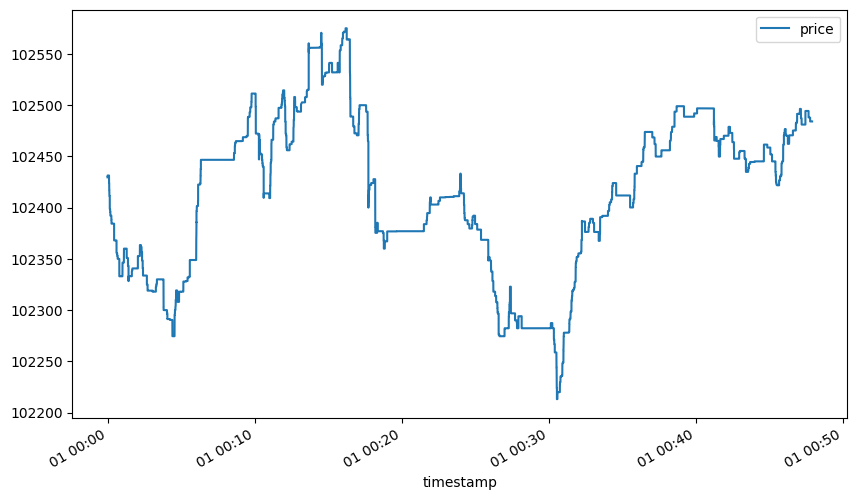

In [158]:
# maker.pnl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# data_pnl = data_pnl.loc[0:79999]

data_binance_trade_view = data_binance_trade.loc[0:79999]   
data_binance_trade_view['timestamp'] = pd.to_datetime(data_binance_trade_view['timestamp']/1000000,unit='s',utc=True)
# data_pnl = maker.pnl.loc[0:79999]
# data_pnl['time'] = pd.to_datetime(data_pnl['time']/1000000,unit='s',utc=True)
data_binance_trade_view.plot(kind='line',x = 'timestamp',y='price',figsize=(10,6))
plt.show()


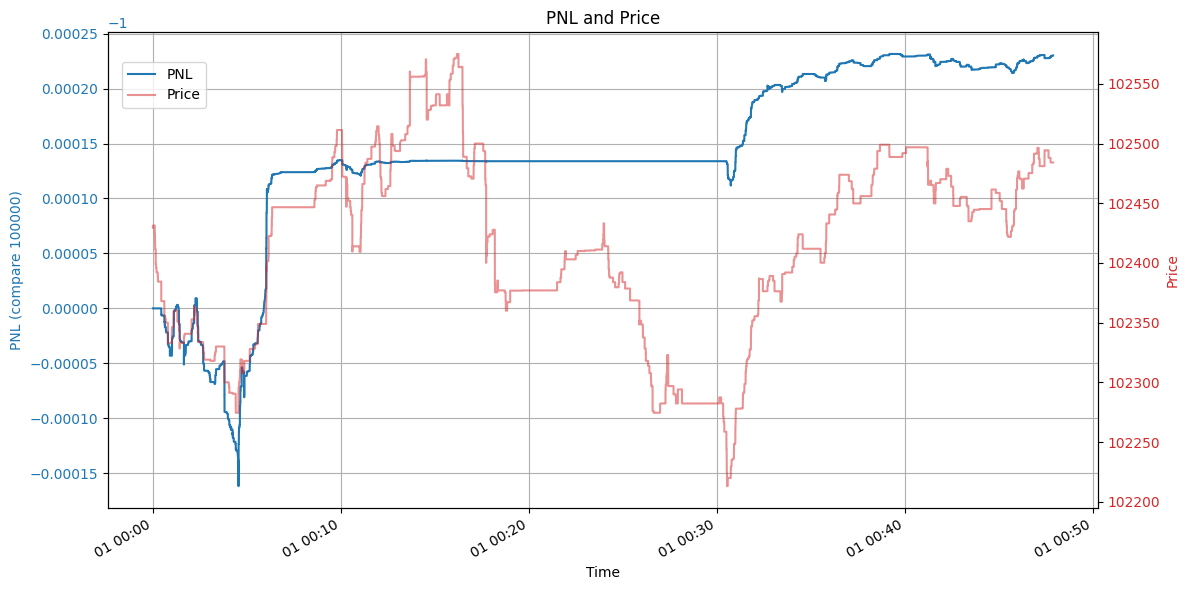

In [156]:
import matplotlib.pyplot as plt

# 假设数据已经加载到以下变量中:
# data_pnl - 包含策略PNL数据
# data_binance_trade_view - 包含市场价格数据

# 创建图形和第一个坐标轴
fig, ax1 = plt.subplots(figsize=(12, 6))

# 绘制第一个数据集 (策略PNL)
color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('PNL (compare 100000)', color=color)
ax1.plot(data_binance_trade_view['timestamp'], 
         (data_pnl['pnl']-100000)/100000, 
         color=color, label='PNL')
ax1.tick_params(axis='y', labelcolor=color)

# 创建第二个坐标轴，共享x轴
ax2 = ax1.twinx()

# 绘制第二个数据集 (市场价格)
color = 'tab:red'
ax2.set_ylabel('Price', color=color)
ax2.plot(data_binance_trade_view['timestamp'], 
         data_binance_trade_view['price'], 
         color=color, alpha=0.5, label='Price')
ax2.tick_params(axis='y', labelcolor=color)

# 添加标题和图例
plt.title('PNL and Price')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# 自动调整x轴日期格式
fig.autofmt_xdate()

# 显示网格
ax1.grid(True)

plt.tight_layout()
plt.show()


In [83]:
maker.pending_order

Empty DataFrame
Columns: [timestamp, price, size, side]
Index: []

In [92]:
order = Orderbook('BTCUSDT')
order.add_ask(10000, 10) 
order.add_ask(10000, 10) 
order.add_ask(10000.2, 11)
order.add_ask(10000.1, 12)
order.add_bid(9000, 10)
order.add_bid(9000.1, 11)
order.add_bid(9000.2, 12)
order.add_bid(8999, 13)


In [32]:
import pandas as pd
data_bybit_snap5 = pd.read_csv('../datasets/bybit_book_snapshot_5_2025-07-01_FARTCOINUSDT.csv')
data_bybit_trade = pd.read_csv('../datasets/bybit_trades_2025-07-01_FARTCOINUSDT.csv')
data_bybit_snap5 = data_bybit_snap5[['timestamp', 'asks[0].price', 'bids[0].price']]


In [33]:
data_bybit_trade

exchange        symbol         timestamp   local_timestamp  \
0         bybit  FARTCOINUSDT  1751328000352000  1751328000391471   
1         bybit  FARTCOINUSDT  1751328000352000  1751328000391471   
2         bybit  FARTCOINUSDT  1751328002320000  1751328002360035   
3         bybit  FARTCOINUSDT  1751328002320000  1751328002360035   
4         bybit  FARTCOINUSDT  1751328002320000  1751328002360035   
...         ...           ...               ...               ...   
710349    bybit  FARTCOINUSDT  1751414398399000  1751414398439365   
710350    bybit  FARTCOINUSDT  1751414398431000  1751414398471645   
710351    bybit  FARTCOINUSDT  1751414399426000  1751414399467850   
710352    bybit  FARTCOINUSDT  1751414399426000  1751414399467850   
710353    bybit  FARTCOINUSDT  1751414399574000  1751414399614044   

                                          id  side   price  amount  
0       e2f24c73-f935-5985-92e1-9cd9f63828f1  sell  1.1431       7  
1       85d01e2d-8e00-5038-8507-ab162aa27336  sell  1.1431      32  
2       1e84117f-6f3a-59a5-b923-cc0c9d5dcc99   buy  1.1432     250  
3       05d40cf1-f1bd-5af4-b4aa-9af5dbfb42bf   buy  1.1432     323  
4       f2bd9ed1-03f1-5700-b0b1-5b3c186cac15   buy  1.1432       1  
...                                      ...   ...     ...     ...  
710349  13062487-152d-5596-b284-7019c2665168  sell  1.0199      43  
710350  29ae5b90-86e0-551d-90c9-831c88c89c9f  sell  1.0198      63  
710351  6b0942ab-a80f-5dd9-baa6-7d290aafb3e1   buy  1.0199       2  
710352  5b8dd94c-f281-54ce-8b9d-8c17402bb9e9   buy  1.0199     432  
710353  67a2cbe0-c8c9-55c8-adff-b8a2aa938900  sell  1.0199     181  

[710354 rows x 8 columns]

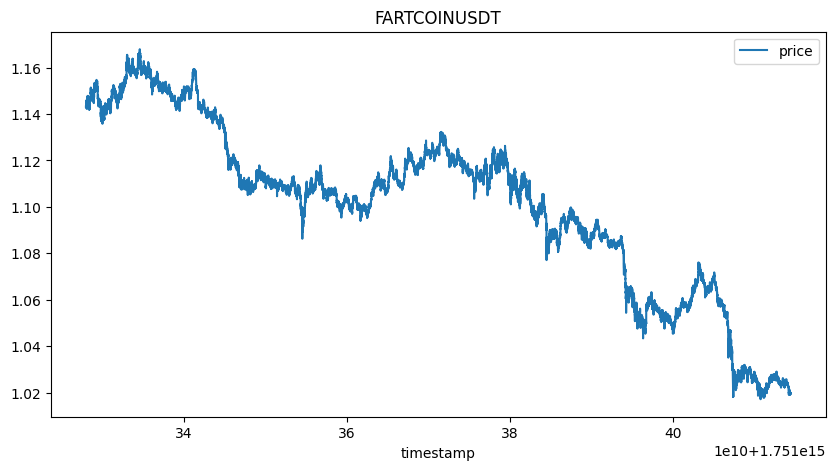

In [34]:
import matplotlib.pyplot as plt

data_bybit_trade.plot(x='timestamp', y='price', kind='line', figsize=(10, 5), title='FARTCOINUSDT')
plt.show()

In [36]:
import pandas as pd
import numpy as np 

class Order:
    def __init__(self, symbol):
        self.symbol = symbol
        self.ask = pd.DataFrame(columns=['price', 'size'])
        self.bid = pd.DataFrame(columns=['price', 'size'])
    def add_ask(self, ask_price, ask_size):
        if((abs(self.ask['price'] - ask_price) < 1e-9).any()):
            self.ask.loc[abs(self.ask['price'] - ask_price) < 1e-9, 'size'] += ask_size
        else:
            # self.ask.loc[abs(self.ask['price'] - ask_price) < 1e-6] = pd.DataFrame([ask_price, ask_size])
            self.ask.loc[len(self.ask)] = [ask_price, ask_size]
        self.ask.sort_values(by='price', ascending=False, inplace=True)
    def add_bid(self, bid_price, bid_size):
        if((abs(self.bid['price'] - bid_price) < 1e-9).any()):
            self.bid.loc[abs(self.bid['price'] - bid_price) < 1e-9, 'size'] += bid_size
        else:
            # self.bid.loc[abs(self.bid['price'] - bid_price) < 1e-6] = pd.DataFrame([bid_price, bid_size])
            self.bid.loc[len(self.bid)] = [bid_price, bid_size]
        self.bid.sort_values(by='price', ascending=False, inplace=True)
    def del_ask(self, ask_price):
        if((abs(self.ask['price'] - ask_price) < 1e-9).any()):
            self.ask= self.ask[abs(self.ask['price'] - ask_price) > 1e-6]
            return True
        else:
            return False
    def del_bid(self, bid_price):
        if((abs(self.bid['price'] - bid_price) < 1e-9).any()):
            self.bid = self.bid[abs(self.bid['price'] - bid_price) > 1e-9]
            return True
        else:
            return False
class MarketMaker:
    def __init__(self, symbol, initial_capital=100000, spread_percent=0.001, max_inventory1=40000,max_inventory2 = 60000, order_size=100):
        self.symbol = symbol
        self.inventory = 0
        self.initial_capital = initial_capital # 初始资金
        self.capital = initial_capital #USDT数量
        self.capital_use = initial_capital # 未用资金(扣掉已用于挂单的资金)
        self.inventory_use = 0  # 未用库存()扣掉已用于挂单的资产)
        self.total = initial_capital #总资产
        self.spread_percent = spread_percent
        self.spread_percent_buy = spread_percent
        self.spread_percent_sell = spread_percent
        self.max_inventory1 = max_inventory1
        self.max_inventory2 = max_inventory2
        self.order_size = order_size
        self.trade_buy = []
        self.trade_sell = []
        self.inventory_store = []
        self.pnl = pd.DataFrame(columns=['time', 'pnl'])
        self.pending_order = pd.DataFrame(columns=['timestamp','price', 'size','side']) # 下单队列
        self.pending_del = pd.DataFrame(columns=['timestamp','price', 'size','side'])  # 撤单队列
        
    def calculate_spread(self, price):
        ask_price = round((price * (1 + self.spread_percent_sell)) * 10000) / 10000 # 交易所报价精度为0.0001
        bid_price = round(price * (1 - self.spread_percent_buy) * 10000) / 10000
        # ask_size = self.order_size
        # bid_price = self.order_size
        return ask_price, bid_price
    def update_inventory(self, price, size): # size为正数时买入，为负数时卖出
        self.inventory += size
        self.capital -= price * size
        if(self.inventory * price > self.max_inventory1 and self.inventory * price < self.max_inventory2):
            self.spread_percent_buy = self.spread_percent * 2
            self.spread_percent_sell = self.spread_percent * 2
        elif(self.inventory * price > self.max_inventory2):
            self.spread_percent_buy = self.spread_percent * 4
            self.spread_percent_sell = self.spread_percent
        else:
            self.spread_percent_buy = self.spread_percent
            self.spread_percent_sell = self.spread_percent * 4
        # self.inventory_use += size
        # if size < 0:
        #     self.capital_use += price * size
        # else:
        #     self.inventory_use += size
    def update_total(self, price, time):
        self.total = self.capital + self.inventory * price
        self.pnl.loc[len(self.pnl)] = [time, self.total - self.initial_capital]
        self.inventory_store.append(self.inventory * price)
    # def update_trade(self, price, size):
    #     if size > 0:
    #         self.trade_buy.append([price, size])
    #     else:
    #         self.trade_sell.append([price, -size])
    def handle_order(self, price, size, time):
        if (size > 0): # 买单成交
            # self.trade_buy.append([price, size])
            self.update_inventory(price, size)
            # self.update_total(price,time)

        elif (size < 0): # 卖单成交
            # self.trade_sell.append([price, size])
            self.update_inventory(price, size)
            # self.update_total(price,time)
        else: # 未成交
            pass
# def main():
symbol = 'FARTCOINUSDT'
maker = MarketMaker(symbol, initial_capital = 100000, spread_percent=  0.0005, order_size = 100)
order = Order('FARTCOINUSDT')

index = 80000
# while(index < len(data_binance_trade)):
time_early = data_bybit_trade.iloc[0]['timestamp']
time_end = data_bybit_trade.iloc[0]['timestamp'] + 500000

while(index < 130000):

    price = data_bybit_trade.iloc[index]['price']

    i_index = 0
    for i in range(len(maker.pending_del)):
        if(maker.pending_del.iloc[i]['timestamp'] <= data_bybit_trade.iloc[index]['timestamp'] - 20000):    #达到20ms 订单被撤销
            if(maker.pending_del.iloc[i]['side'] == 'sell'):
                size = order.ask.loc[abs(order.ask['price'] - maker.pending_del.iloc[i]['price']) < 1e-9,'size']
                success = order.del_ask(maker.pending_del.iloc[i]['price'])
                # maker.inventory_use = maker.inventory - order.ask['size'].sum()
            elif(maker.pending_del.iloc[i]['side'] == 'buy'):
                size = order.bid.loc[abs(order.bid['price'] - maker.pending_del.iloc[i]['price']) < 1e-9,'size']
                success = order.del_bid(maker.pending_del.iloc[i]['price'])
                # maker.capital_use = maker.capital - (order.bid['price'] * order.bid['size']).sum()
            i_index += 1
        else:
            pass
    # maker.pending_del.drop(maker.pending_del.index[range(i_index)], inplace=True)
    maker.pending_del = maker.pending_del[maker.pending_del['timestamp'] > data_bybit_trade.iloc[index]['timestamp'] - 20000]


    i_index = 0
    for i in range(len(maker.pending_order)):
        if(maker.pending_order.iloc[i]['timestamp'] <= data_bybit_trade.iloc[index]['timestamp'] - 20000):    #达到20ms 订单被提交
            if(maker.pending_order.iloc[i]['side'] == 'sell'):
                order.add_ask(maker.pending_order.iloc[i]['price'], maker.pending_order.iloc[i]['size'])
                # print(order.ask)
                # print('add_ask')
            elif(maker.pending_order.iloc[i]['side'] == 'buy'):
                order.add_bid(maker.pending_order.iloc[i]['price'], maker.pending_order.iloc[i]['size'])
                # print(order.bid)
                # print('add_bid')
            # maker.pending_order.drop(i, inplace=True)
            i_index += 1
        else:
            pass


    # maker.pending_order.drop(maker.pending_order.index[range(i_index)], inplace=True)
    maker.pending_order = maker.pending_order[maker.pending_order['timestamp'] > data_bybit_trade.iloc[index]['timestamp'] - 20000]

    print(index, maker.inventory,maker.inventory_use,maker.total, maker.capital, maker.capital_use, maker.pending_order.shape,order.ask.shape , order.ask['size'].sum(),order.bid.shape, order.bid['size'].sum())
    buy_number = 0
    sell_number = 0
    if(order.ask['price'].any() and data_bybit_trade.iloc[index]['side'] == 'buy'):
        ask_enchange = order.ask[order.ask['price'] < price]
        for i_ask in range(len(ask_enchange)):
            # print('sell')
            sell_number +=  ask_enchange.iloc[i_ask]['price'] * ask_enchange.iloc[i_ask]['size']
            maker.handle_order(ask_enchange.iloc[i_ask]['price'], -ask_enchange.iloc[i_ask]['size'], data_bybit_trade.iloc[index]['timestamp'])
        
        order.ask = order.ask[order.ask['price'] >= price]
    elif(order.bid['price'].any() and data_bybit_trade.iloc[index]['side'] == 'sell'):
        bid_enchange = order.bid[order.bid['price'] > price]
        for i_bid in range(len(bid_enchange)):
            buy_number += bid_enchange.iloc[i_bid]['price'] * bid_enchange.iloc[i_bid]['size']
            # print('buy')
            maker.handle_order(bid_enchange.iloc[i_bid]['price'], bid_enchange.iloc[i_bid]['size'], data_bybit_trade.iloc[index]['timestamp'])
            # maker.inventory_use += bid_enchange.iloc[i_bid]['size']
            # maker.inventory_use = maker.inventory - order.bid['size'].sum()
        order.bid = order.bid[order.bid['price'] <= price]
    else:
        pass

    pending_order_buy = maker.pending_order.loc[maker.pending_order['side'] == 'buy']
    maker.capital_use = maker.capital - (order.bid['price'] * order.bid['size']).sum() - (pending_order_buy['price'] * pending_order_buy['size']).sum()
    maker.inventory_use = maker.inventory - order.ask['size'].sum() - maker.pending_order.loc[maker.pending_order['side'] == 'sell','size'].sum()

    # 撤单逻辑
    if(maker.capital_use < price * maker.order_size and maker.capital > price * maker.order_size and order.bid['price'].any()): # 检查资金量是否满足要求
        maker.pending_del.loc[len(maker.pending_del)] = [data_bybit_trade.iloc[index]['timestamp'], order.bid.loc[order.bid['price'].idxmin(),'price'], order.bid.loc[order.bid['price'].idxmin(),'size'],'buy']
    if(maker.inventory_use < maker.order_size and maker.inventory >= maker.order_size and order.ask['price'].any()):
        maker.pending_del.loc[len(maker.pending_del)] = [data_bybit_trade.iloc[index]['timestamp'], order.ask.loc[order.ask['price'].idxmax(),'price'], order.ask.loc[order.ask['price'].idxmax(),'size'],'sell']

        # maker.capital_use += order.ask['price'].min() * order.ask.loc[order.ask['price'].idxmin(), 'size']
    # order.ask = order.ask[order.ask['price'] > order.ask['price'].min()]

    ask_price, bid_price = maker.calculate_spread(price)
    ask_size = maker.order_size
    bid_size = maker.order_size
    delay = data_bybit_trade.iloc[index]['timestamp'] + 20000
    label_buy = True
    label_sell = True
    t = (data_bybit_snap5['timestamp'] <= delay)
    if((len(t) > 0) and data_bybit_trade.iloc[index]['timestamp'] > time_end): #若20 ms后ticker挂单会被直接市价成交,则不进入挂单队列
        snap25_time = data_bybit_snap5.loc[data_bybit_snap5['timestamp'] <= delay,'timestamp'].idxmax()
        ticker_ask = data_bybit_snap5.iloc[snap25_time]['asks[0].price'] #此处还没有挂单队列
        ticker_bid = data_bybit_snap5.iloc[snap25_time]['bids[0].price']
        if(ticker_ask < bid_price and maker.capital_use > ticker_ask * bid_size and snap25_time >= data_bybit_trade.iloc[index]['timestamp']):
            maker.update_inventory(ticker_ask, bid_size)        # 买单成交
            buy_number += 1
            # maker.update_total(ticker_ask,data_bybit_trade.iloc[index]['timestamp'])
            # maker.update_trade(ticker_ask, bid_size)
            maker.capital_use -= ticker_ask * bid_size
            maker.inventory_use += bid_size
            time_early = data_bybit_trade.iloc[index]['timestamp']
            # time_end = data_bybit_trade.iloc[index]['timestamp'] + 500000
            label_buy = False
            # maker.
        elif(ticker_bid > ask_price and maker.inventory_use > ask_size and snap25_time >= data_bybit_trade.iloc[index]['timestamp']):
            maker.update_inventory(ticker_bid, -ask_size)        # 卖单成交
            sell_number += 1
            # maker.update_total(ticker_bid,data_bybit_trade.iloc[index]['timestamp'])
            # maker.update_trade(ticker_bid, -ask_size)
            maker.capital_use += ticker_bid * ask_size
            maker.inventory_use -= ask_size
            time_early = data_bybit_trade.iloc[index]['timestamp']
            # time_end = data_bybit_trade.iloc[index]['timestamp'] + 500000
            label_sell = False

    # else:
    if(maker.capital_use >= bid_price * bid_size and label_buy and data_bybit_trade.iloc[index]['timestamp'] > time_end): # 检查资金量是否满足要求
        maker.pending_order.loc[len(maker.pending_order)] = [data_bybit_trade.iloc[index]['timestamp'], bid_price, bid_size, 'buy']
        time_early = data_bybit_trade.iloc[index]['timestamp']
        
        # maker.capital_use -= bid_price * bid_size
    if(maker.inventory_use >= ask_size and label_sell and data_bybit_trade.iloc[index]['timestamp'] > time_end): # 检查库存量是否满足要求
        maker.pending_order.loc[len(maker.pending_order)] = [data_bybit_trade.iloc[index]['timestamp'], ask_price, ask_size, 'sell']
        time_early = data_bybit_trade.iloc[index]['timestamp']
    if(data_bybit_trade.iloc[index]['timestamp'] > time_end):
        time_end = data_bybit_trade.iloc[index]['timestamp'] + 500000
            # maker.inventory_use -= ask_size

    maker.trade_buy.append(buy_number)
    maker.trade_sell.append(sell_number)
    index = index + 1
    maker.update_total(price,data_bybit_trade.iloc[index]['timestamp'])
# main()


80000 0 0 100000 100000 100000 (0, 4) (0, 2) 0 (0, 2) 0
80001 0 0 100000.0 100000 100000 (1, 4) (0, 2) 0 (0, 2) 0
80002 0 0 100000.0 100000 99884.96 (0, 4) (0, 2) 0 (1, 2) 100.0
80003 0 0 100000.0 100000 99884.96 (0, 4) (0, 2) 0 (1, 2) 100.0
80004 0 0 100000.0 100000 99884.96 (0, 4) (0, 2) 0 (1, 2) 100.0
80005 0 0 100000.0 100000 99884.96 (0, 4) (0, 2) 0 (1, 2) 100.0
80006 0 0 100000.0 100000 99884.96 (0, 4) (0, 2) 0 (1, 2) 100.0
80007 0 0 100000.0 100000 99884.96 (0, 4) (0, 2) 0 (2, 2) 200.0
80008 0 0 100000.0 100000 99769.91 (1, 4) (0, 2) 0 (2, 2) 200.0
80009 0 0 100000.0 100000 99654.86 (1, 4) (0, 2) 0 (2, 2) 200.0
80010 0 0 100000.0 100000 99654.86 (1, 4) (0, 2) 0 (2, 2) 200.0
80011 0 0 100000.0 100000 99654.86 (1, 4) (0, 2) 0 (2, 2) 200.0
80012 0 0 100000.0 100000 99654.86 (1, 4) (0, 2) 0 (2, 2) 200.0
80013 0 0 100000.0 100000 99654.86 (1, 4) (0, 2) 0 (2, 2) 200.0
80014 0 0 100000.0 100000 99654.86 (1, 4) (0, 2) 0 (2, 2) 200.0
80015 0 0 100000.0 100000 99654.86 (1, 4) (0, 2) 0 (2,

In [57]:
maker.pnl.shape
sum(maker.trade_sell) - sum(maker.trade_buy)

np.float64(920.7500000000291)

In [37]:
account_buy = []
account_sell = []
for i in range(len(maker.trade_buy)):
    if i == 0:
        account_buy.append(maker.trade_buy[0])
        account_sell.append(maker.trade_sell[0])
    else:
        account_buy.append(account_buy[i-1] + maker.trade_buy[i])
        account_sell.append(account_sell[i-1] + maker.trade_sell[i])

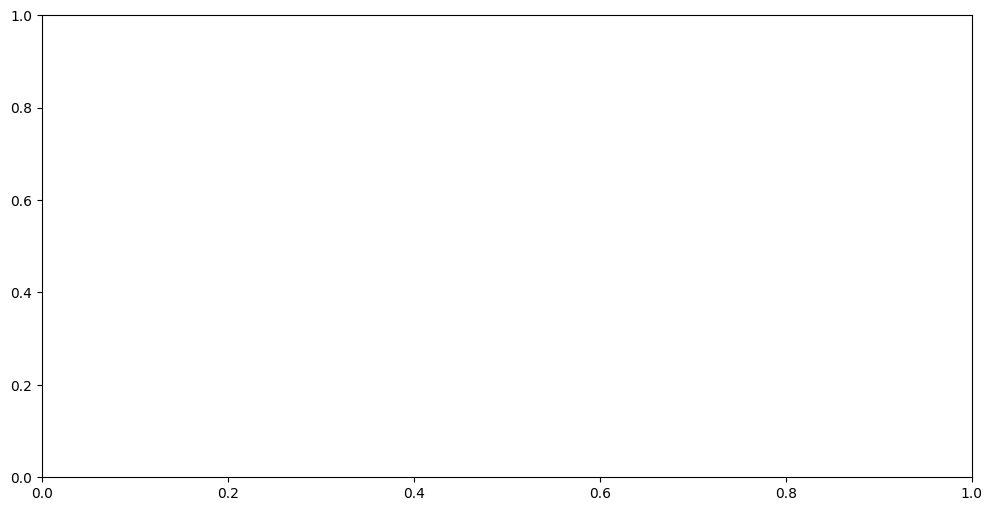

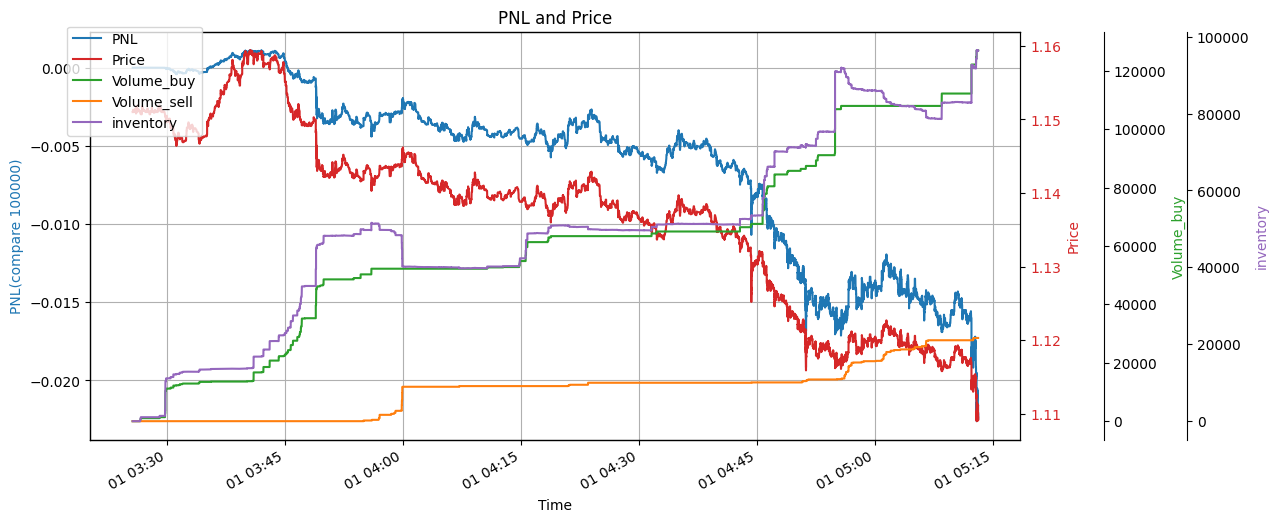

In [40]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 6))

x = pd.to_datetime(data_bybit_trade['timestamp']/1000000, unit='s')
x = x.loc[80000:129999]
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('PNL(compare 100000)',color=color)
ax1.plot(x, (maker.pnl['pnl'])/100000, color=color, label = "PNL")

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Price', color=color)   
ax2.plot(x, data_bybit_trade.loc[80000:129999]['price'], color=color, label = "Price")
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
color = 'tab:green' 
ax3.set_ylabel('Volume_buy', color=color)
ax3.plot(x, account_buy, color=color, label = "Volume_buy")
ax3.plot(x, account_sell, color = 'tab:orange', label = "Volume_sell")
# ax3.tick_params(axis='y', labelcolor='tab:orange')

ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))
color = 'tab:purple'
ax4.set_ylabel('inventory', color=color)
ax4.plot(x, maker.inventory_store, color=color, label = "inventory")  

plt.title("PNL and Price")
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
fig.autofmt_xdate()

# 显示网格
ax1.grid(True)

In [37]:
import pandas as pd
import numpy as np
data_binance_quotes_future = pd.read_csv('../datasets/binance-futures_book_snapshot_25_2025-07-22_DOGEUSDT.csv')
data_binance_trade_future = pd.read_csv('../datasets/binance-futures_trades_2025-07-22_DOGEUSDT.csv')
data_binance_ticker_future = pd.read_csv('../datasets/binance-futures_book_ticker_2025-07-22_DOGEUSDT.csv')


In [39]:
data_binance_ticker_future = (data_binance_ticker_future[['timestamp','ask_price','bid_price']])
data_binance_trade_future = (data_binance_trade_future[['timestamp','price','side']])
ticker = data_binance_ticker_future.to_numpy()
trade = data_binance_trade_future.to_numpy()

In [43]:
ticker_2 = ticker[ticker[:,1] - ticker[:,2] > 0.00004]
ticker_2.shape

(108219, 3)

In [ ]:
import pandas as pd
import numpy as np 

class Order:
    def __init__(self, symbol):
        self.symbol = symbol
        self.ask = pd.DataFrame(columns=['price', 'size'])
        self.bid = pd.DataFrame(columns=['price', 'size'])
    def add_ask(self, ask_price, ask_size):
        if((abs(self.ask['price'] - ask_price) < 1e-9).any()):
            self.ask.loc[abs(self.ask['price'] - ask_price) < 1e-9, 'size'] += ask_size
        else:
            # self.ask.loc[abs(self.ask['price'] - ask_price) < 1e-6] = pd.DataFrame([ask_price, ask_size])
            self.ask.loc[len(self.ask)] = [ask_price, ask_size]
        self.ask.sort_values(by='price', ascending=False, inplace=True)
    def add_bid(self, bid_price, bid_size):
        if((abs(self.bid['price'] - bid_price) < 1e-9).any()):
            self.bid.loc[abs(self.bid['price'] - bid_price) < 1e-9, 'size'] += bid_size
        else:
            # self.bid.loc[abs(self.bid['price'] - bid_price) < 1e-6] = pd.DataFrame([bid_price, bid_size])
            self.bid.loc[len(self.bid)] = [bid_price, bid_size]
        self.bid.sort_values(by='price', ascending=False, inplace=True)
    def del_ask(self, ask_price):
        if((abs(self.ask['price'] - ask_price) < 1e-9).any()):
            self.ask= self.ask[abs(self.ask['price'] - ask_price) > 1e-6]
            return True
        else:
            return False
    def del_bid(self, bid_price):
        if((abs(self.bid['price'] - bid_price) < 1e-9).any()):
            self.bid = self.bid[abs(self.bid['price'] - bid_price) > 1e-9]
            return True
        else:
            return False
class Trade:
    def __init__(self, initial_capital=100000, spread_percent=0.001, max_position = 50000):
        self.initial_capital = initial_capital
        self.capital = initial_capital
        self.spread_percent_buy = spread_percent
        self.spread_percent_sell = spread_percent
        self.max_position = max_position
        self.position = 0
        self.pnl = 0
        self.turnover = 0
        self.rot = 0
        self.pnl_history = []
        self.turnover_history = []
        self.rot_history = []
    def calculate_spread(self, price):
        ask_price = price * (1 + self.spread_percent_sell)
        bid_price = price * (1 - self.spread_percent_buy)
        return ask_price, bid_price
    def update_position(self, price, size):
        self.position += size
        self.capital -= price * size
        self.pnl = self.position * price - self.initial_capital
        self.turnover += price * abs(size)
        self.rot = self.pnl / self.turnover
    def update_history(self):
        self.pnl_history.append(self.pnl)
        self.turnover_history.append(self.turnover)
        self.rot_history.append(self.rot)

